In [1]:
from data_preparation.loaders_novo import *
from config import config as cfg
from models.model2 import *
import datetime
import os
import segmentation_models as sm
import random
import matplotlib.pyplot as plt

Segmentation Models: using `tf.keras` framework.


In [2]:
%load_ext tensorboard

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
data = Dataset(cfg['dataset_path'], cfg['images_path'], cfg['modality'],
                initial_slice=cfg['initial_slice'], final_slice=cfg['final_slice'], extract=False)

>> Filtering black images (without ground truth)..
    ------------
    Before deleting:  0
    After deleting:  0
    ------------
    Before deleting:  0
    After deleting:  0
<< Done!

>> Searching for sets in csv format..
!! Found them.


In [5]:
train_generator = DataGenerator(data.train, batch_size=cfg['batch_size'])
val_generator = DataGenerator(data.val, batch_size=cfg['batch_size'])

In [6]:
steps_per_epoch_train = (len(data.train)) // cfg['batch_size']
steps_per_epoch_val = (len(data.val)) // cfg['batch_size']

In [7]:
tf.keras.backend.clear_session()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

if not os.path.exists(log_dir):
    os.makedirs(log_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
model = unet_model((128,128,1))
history = model.fit(train_generator, validation_data=val_generator, 
                    steps_per_epoch=steps_per_epoch_train, validation_steps = steps_per_epoch_val,
                    epochs = cfg['epochs'], callbacks=[tensorboard_callback])

The modified UNet was built!
Epoch 1/100


D:\Programas\anaconda3\envs\tcc\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
D:\Programas\anaconda3\envs\tcc\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


1242/1242 [==============================] - 203s 158ms/step - loss: 0.5055 - f1-score: 0.4945 - custom_mean_iou: 0.3839 - val_loss: 0.5942 - val_f1-score: 0.4058 - val_custom_mean_iou: 0.3521
Epoch 2/100
1242/1242 [==============================] - 195s 157ms/step - loss: 0.4150 - f1-score: 0.5850 - custom_mean_iou: 0.4853 - val_loss: 0.5580 - val_f1-score: 0.4420 - val_custom_mean_iou: 0.3693
Epoch 3/100
1242/1242 [==============================] - 195s 157ms/step - loss: 0.3626 - f1-score: 0.6374 - custom_mean_iou: 0.5341 - val_loss: 0.4538 - val_f1-score: 0.5462 - val_custom_mean_iou: 0.4747
Epoch 4/100
1242/1242 [==============================] - 194s 157ms/step - loss: 0.3161 - f1-score: 0.6839 - custom_mean_iou: 0.5807 - val_loss: 0.4059 - val_f1-score: 0.5941 - val_custom_mean_iou: 0.5098
Epoch 5/100
1242/1242 [==============================] - 194s 156ms/step - loss: 0.2760 - f1-score: 0.7240 - custom_mean_iou: 0.6235 - val_loss: 0.2971 - val_f1-score: 0.7029 - val_custom_mean

Epoch 41/100
1242/1242 [==============================] - 193s 155ms/step - loss: 0.1063 - f1-score: 0.8937 - custom_mean_iou: 0.8301 - val_loss: 0.1502 - val_f1-score: 0.8498 - val_custom_mean_iou: 0.7827
Epoch 42/100
1242/1242 [==============================] - 193s 155ms/step - loss: 0.1055 - f1-score: 0.8945 - custom_mean_iou: 0.8316 - val_loss: 0.1496 - val_f1-score: 0.8504 - val_custom_mean_iou: 0.7831
Epoch 43/100
1242/1242 [==============================] - 193s 155ms/step - loss: 0.1042 - f1-score: 0.8958 - custom_mean_iou: 0.8332 - val_loss: 0.1458 - val_f1-score: 0.8542 - val_custom_mean_iou: 0.7867
Epoch 44/100
1242/1242 [==============================] - 196s 158ms/step - loss: 0.1031 - f1-score: 0.8969 - custom_mean_iou: 0.8347 - val_loss: 0.1516 - val_f1-score: 0.8484 - val_custom_mean_iou: 0.7795
Epoch 45/100
1242/1242 [==============================] - 192s 155ms/step - loss: 0.1024 - f1-score: 0.8976 - custom_mean_iou: 0.8355 - val_loss: 0.1463 - val_f1-score: 0.8537 

Epoch 81/100
1242/1242 [==============================] - 195s 157ms/step - loss: 0.0787 - f1-score: 0.9213 - custom_mean_iou: 0.8691 - val_loss: 0.1378 - val_f1-score: 0.8622 - val_custom_mean_iou: 0.7974
Epoch 82/100
1242/1242 [==============================] - 202s 163ms/step - loss: 0.0782 - f1-score: 0.9218 - custom_mean_iou: 0.8698 - val_loss: 0.1363 - val_f1-score: 0.8637 - val_custom_mean_iou: 0.7985
Epoch 83/100
1242/1242 [==============================] - 195s 157ms/step - loss: 0.0778 - f1-score: 0.9222 - custom_mean_iou: 0.8704 - val_loss: 0.1411 - val_f1-score: 0.8589 - val_custom_mean_iou: 0.7933
Epoch 84/100
1242/1242 [==============================] - 194s 156ms/step - loss: 0.0772 - f1-score: 0.9228 - custom_mean_iou: 0.8714 - val_loss: 0.1379 - val_f1-score: 0.8621 - val_custom_mean_iou: 0.7982
Epoch 85/100
1242/1242 [==============================] - 194s 156ms/step - loss: 0.0765 - f1-score: 0.9235 - custom_mean_iou: 0.8723 - val_loss: 0.1355 - val_f1-score: 0.8645 

In [9]:
model.save('modelo2.h5')

## Predictions

In [10]:
test_generator = DataGenerator(data.test, batch_size=16)

In [11]:
class CustomMeanIOU(tf.keras.metrics.MeanIoU):
    def update_state(self, y_true, y_pred, sample_weight=None):
        return super().update_state(tf.argmax(y_true, axis=-1), tf.argmax(y_pred, axis=-1), sample_weight)

In [12]:
def save_preds(val_preds, out):
    for i in range(len(val_preds)):
        mask = np.argmax(val_preds[i], axis=-1)
        mask = np.expand_dims(mask, axis=-1)
        imageio.imwrite(out + f'predict_{i}'+ '.png', mask.astype(np.uint8))

In [13]:
def visualize_prediction(i, val_preds):
    img = data.test[i][0]
    img_arr = cv2.imread(img)
    plt.imshow(img_arr)
    plt.show()
    gt = data.test[i][1]
    gt_arr = cv2.imread(gt, 0)
    plt.imshow(gt_arr) 
    plt.show()
    plt.imshow(np.argmax(val_preds[i], axis=-1))
    
    plt.show()
    

In [16]:
val_preds = model.predict(test_generator, verbose=1)

77/77 [==============================] - 7s 94ms/step


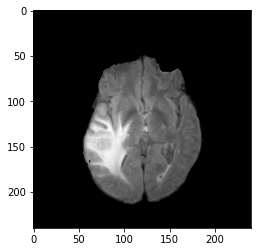

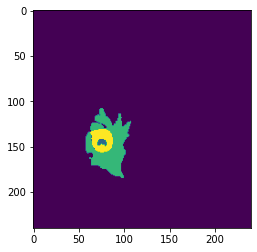

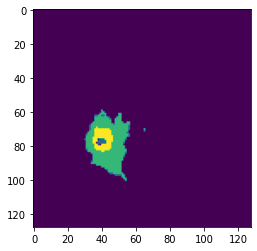

In [23]:
visualize_prediction(659, val_preds)